In [1]:
# import the required libraries

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets as ds

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = ds.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X = iris.data[:, 3:]
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [4]:
# The classes have been coded as numbers:
# 0 = setosa
# 1 = versicolor
# 2 = virginica
Y = (iris.target == 0).astype(np.int) # 1 if setosa, 0 otherwise
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

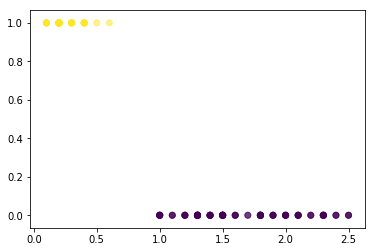

In [5]:
plt.scatter(x = X, y = Y, alpha = 0.5, c = Y)

In [6]:
# That's it!  We can run the linear regression now!
lin_reg = LinearRegression()  # instantiate a linear regression object

lin_reg_model = lin_reg.fit(X, Y )
Y_predictions = lin_reg.predict(X)

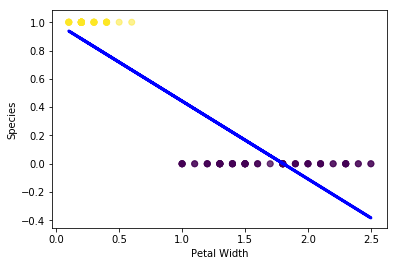

In [16]:
plt.scatter(X, Y, alpha = 0.5, c = Y.reshape(-1,1))
plt.xlabel("Petal Width")
plt.ylabel("Species")

plt.plot(X, Y_predictions, color='blue', linewidth=3)

plt.savefig("plot_iris2.png")

In [7]:
X = iris.data[:, 2:]
log_reg = LogisticRegression()
log_reg.fit(X, Y)
Y_log_pred = log_reg.predict(X)
log_odds = Y_log_pred/(1 - Y_log_pred + 1e-4)
print([log_reg.coef_, log_reg.intercept_])

[array([[-1.14714223, -1.7130534 ]]), array([ 3.97259233])]


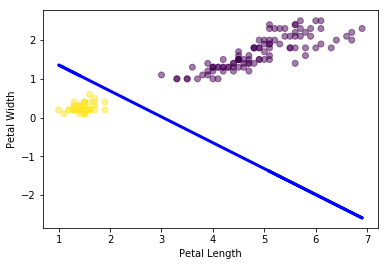

In [8]:
slope = -log_reg.coef_[0,0]/log_reg.coef_[0,1]
intercept = (0.5 - log_reg.intercept_)/log_reg.coef_[0,1]
xline = X[:,0].reshape(-1, 1)
yline = X[:,1].reshape(-1, 1) 

plt.scatter(x = xline, y = yline, alpha = 0.5, c = Y.reshape(-1,1))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.plot(xline, slope*xline + intercept, color='blue', linewidth=3)
plt.savefig("plot_iris.png")

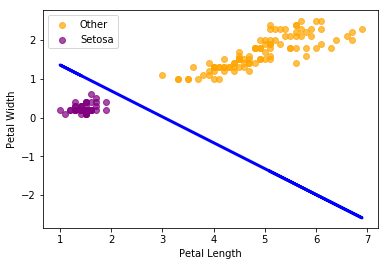

In [52]:
classes = Y
linLegend = ["Other", "Setosa"]
unique = list(set(classes))
colors = ["orange", "purple"]
boundary = slope*xline + intercept
for i, u in enumerate(unique):
    xi = [xline[j] for j  in range(len(xline)) if classes[j] == u]
    yi = [yline[j] for j  in range(len(xline)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=linLegend[u], alpha = 0.7)
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.plot(xline, boundary, color='blue', linewidth=3)
plt.savefig("plot_iris3.png")

Wir haben US Zensus Daten von http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data runtergeladen.
(Informationen und Datenbeschreibung befinden sich auf http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.names)

Wir wollen anhand der Daten die Höhe des jährlichen Einkommens vorhersagen - "Income". Diese Variable hat nur zwei Kategorien: >50K, <=50K, also suchen wir uns eine Kategorie aus - sagen wir ">50K" - und wandeln die Zielvariable $Y$ einfach in eine Indikatorvariabel für ">50K" um: also $Y = 1$ wenn Income = ">50K", und $Y = 0$ falls nicht.

In [2]:
# Import the libraries needed to read the dataset
import os
import pandas as pd
import numpy as np


# Other libraries we will need
import seaborn as sns   # for creating a heatmap of correlated variables
import matplotlib.pyplot as plt  # for creating plots of the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools

# Import our own library, which has some utility functions we need
import CatNB 

# The dataset is in the Data folder
DATASET_PATH = 'Data/'

# Read the data from the CSV file
data_path = os.path.join(DATASET_PATH, 'census1.csv')
censusData = pd.read_csv(data_path, na_values = ["?", " ?"], encoding = "utf-7") # we know that libreOffice is using utf-7 encoding

# Because the CSV doesn't contain any header, we add column names 
# using the description from the original dataset website 
# http://mlr.cs.umass.edu/ml/machine-learning-databases/adult

censusData.columns = [
    "Age", "WorkClass", "FnlWgt",
    "Education", "EducationNum", "MaritalStatus",
    "Occupation", "Relationship", "Race", "Gender", 
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]



In [3]:
# Get to know the data with head, describe, and info methods

# Visualise a table with the first rows of the dataset, to
# better understand the data format
print(censusData.head())
print(censusData.describe())
print(censusData.info())

   Age          WorkClass  FnlWgt   Education  EducationNum  \
0   50   Self-emp-not-inc   83311   Bachelors            13   
1   38            Private  215646     HS-grad             9   
2   53            Private  234721        11th             7   
3   28            Private  338409   Bachelors            13   
4   37            Private  284582     Masters            14   

         MaritalStatus          Occupation    Relationship    Race   Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Income  
0            0            0            13   United-States   <=50K  
1         

Logistische Regression kann zwar mit Kategorischen Attributen arbeiten, aber dazu müssen sie zuerst in "Dummy Variables" umgewandelt werden.  Wir wollen uns hier aber das Leben nicht unnötig komplizieren, und werden nur die numerischen Variabeln in betracht ziehen.

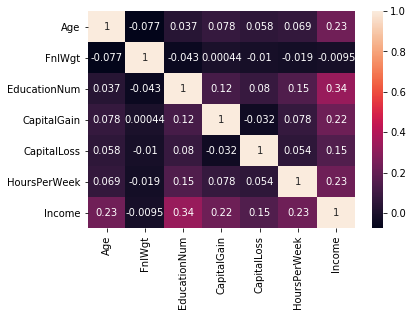

In [4]:
newData = CatNB.strip_white_space(censusData)
newData = newData.select_dtypes(['number']).assign(Income = newData.Income == ">50K")

X = newData.drop(["Income"], axis = 1)
Y = newData.Income.astype(np.int, inplace = True)

corr = newData.corr()
%matplotlib inline

sns.heatmap(corr, annot = True)


Logistische Regression funktioniert nicht gut, wenn die unabhängigen Variabeln mit einander korreliert sind. Ein schneller Blick auf die Korrelationsmatrix *deutet* darauf hin, daß die Variabeln eher unkorreliert sind (es gibt wenig 1-1 korrelation, aber es könnten immer noch mehrfach Abhängigkeiten geben - *Multikorrelation* - die mit dem *Variance Inflation Factor* berechnet werden).

Und jetzt kann es los gehen:

In [5]:
# Now, lets split the data into train and test sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 18)

# Instantiate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)



coefs = {X.columns[i]: log_reg.coef_[0, i] for i in range(len(X.columns))}
print(coefs)

{'Age': -0.007144861465636175, 'FnlWgt': -3.8146851882803172e-06, 'EducationNum': -0.0016475066013254113, 'CapitalGain': 0.0003459980920921773, 'CapitalLoss': 0.0007933082788940905, 'HoursPerWeek': -0.0077876243158554615}


Confusion matrix, without normalization
[[7165  259]
 [1721  623]]
Normalized confusion matrix
[[0.97 0.03]
 [0.73 0.27]]


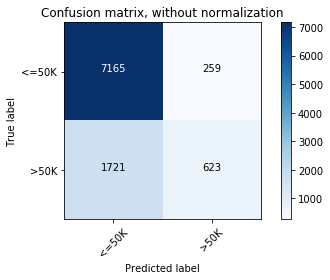

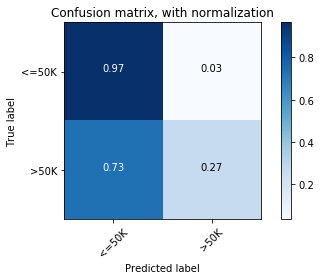

In [6]:
Y_pred = log_reg.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
CatNB.plot_confusion_matrix(cnf_matrix, classes=["<=50K", ">50K"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
CatNB.plot_confusion_matrix(cnf_matrix, classes=["<=50K", ">50K"], normalize = True,
                      title='Confusion matrix, with normalization')

In [7]:
Y_prob = log_reg.predict_proba(X_test)
print(Y_prob.shape)
print(X_test.shape)
Y_prob[: , 0]

(9768, 2)
(9768, 6)


array([0.74, 0.71, 0.76, ..., 0.77, 0.77, 0.76])

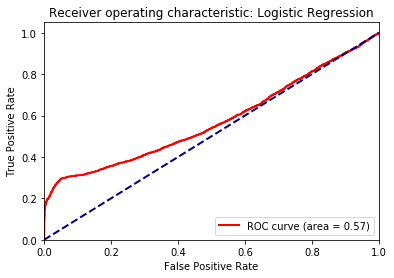

In [8]:
# The roc_curve metric returns the False Positive Rate (FPR), the True Positive Rate (TPR), 
# and the Thresholds (the cutoff probability for determining the class), which we don't need here.

FPR, TPR, _ = roc_curve(Y_test, Y_prob[: , 1])
ROC_AUC = roc_auc_score(Y_test, Y_prob[: , 1])
# we could also use the more generic ROC_AUC = auc(FPR, TPR)

plt.figure()
lw = 2
plt.plot(FPR, TPR, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Logistic Regression')
plt.legend(loc="lower right")
plt.show()